In [1]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import spacy
import numpy as np
from spacy.matcher import Matcher
from spacy.matcher import Matcher 
from spacy.matcher import PhraseMatcher
from skillNer.general_params import SKILL_DB
from skillNer.skill_extractor_class import SkillExtractor
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics  import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
import warnings
nlp = spacy.load('en_core_web_lg')
matcher = Matcher(nlp.vocab)

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_excel('dataset_final.xlsx')

In [3]:
df.shape

(20780, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experiences           20780 non-null  object
 1   Verbs number          20780 non-null  int64 
 2   Adjectives number     20780 non-null  int64 
 3   Stopwords number      20780 non-null  int64 
 4   Sentence length       20780 non-null  int64 
 5   Nouns number          20780 non-null  int64 
 6   Special chars number  20780 non-null  int64 
 7   Punctuation number    20780 non-null  int64 
 8   Digits number         20780 non-null  int64 
 9   Skills number         20780 non-null  int64 
 10  IsExperience          20780 non-null  object
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [5]:
df.columns

Index(['experiences', 'Verbs number', 'Adjectives number', 'Stopwords number',
       'Sentence length', 'Nouns number', 'Special chars number',
       'Punctuation number', 'Digits number', 'Skills number', 'IsExperience'],
      dtype='object')

In [6]:
df.head()

,experiences,Verbs number,Adjectives number,Stopwords number,Sentence length,Nouns number,Special chars number,Punctuation number,Digits number,Skills number,IsExperience
0,How many years' experience do you have as a Da...,1,1,7,13,2,0,2,0,1,YES
1,"be, co that says",1,0,2,5,1,0,1,0,0,NO
2,"a good team player, motivated by team and comp...",2,2,5,16,6,0,2,0,0,YES
3,", or equivalent professional experience",0,2,1,5,1,0,1,0,0,YES
4,It is old lets up,1,1,3,5,0,0,0,0,0,NO


In [7]:
df.tail()

,experiences,Verbs number,Adjectives number,Stopwords number,Sentence length,Nouns number,Special chars number,Punctuation number,Digits number,Skills number,IsExperience
20775,Lead the implementation and integration of aut...,2,2,6,27,11,0,6,0,6,YES
20776,Ability to prioritize and multitask to meet va...,3,1,4,11,3,0,1,0,3,YES
20777,"Go Trav, fall bad bunda of them, go",3,1,4,10,1,0,2,0,0,NO
20778,“All Blue” by Junge Alonson and Peter Salford,0,0,3,10,0,0,2,0,0,NO
20779,"How funny, how funny",0,2,2,5,0,0,1,0,0,NO


In [8]:
df.describe()

,Verbs number,Adjectives number,Stopwords number,Sentence length,Nouns number,Special chars number,Punctuation number,Digits number,Skills number
count,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000
mean,1.054331,0.785371,3.040712,10.500144,2.701347,0.201973,1.462897,0.134456,1.037584
std,1.263603,1.099084,2.695403,7.255643,2.867954,0.709072,1.739611,0.455347,1.617848
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,9.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,1.000000,4.000000,14.000000,4.000000,0.000000,2.000000,0.000000,2.000000
max,20.000000,9.000000,42.000000,63.000000,24.000000,10.000000,25.000000,8.000000,14.000000


In [9]:
df.isna().sum()

experiences             0
Verbs number            0
Adjectives number       0
Stopwords number        0
Sentence length         0
Nouns number            0
Special chars number    0
Punctuation number      0
Digits number           0
Skills number           0
IsExperience            0
dtype: int64

In [10]:
df.describe(include=['object'])

,experiences,IsExperience
count,20780,20780
unique,11408,2
top,What's your expected monthly basic salary?,YES
freq,270,10980


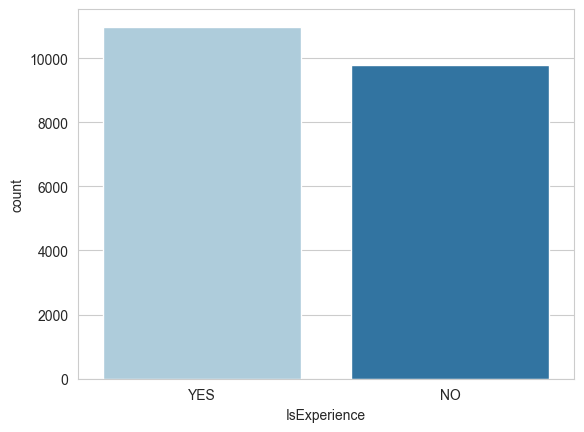

In [11]:
# Groupement Label 
sns.set_style('whitegrid')
custom_palette = sns.color_palette("Paired", len(df['IsExperience'].unique()))
sns.countplot(x='IsExperience', data=df, palette=custom_palette)
plt.show()

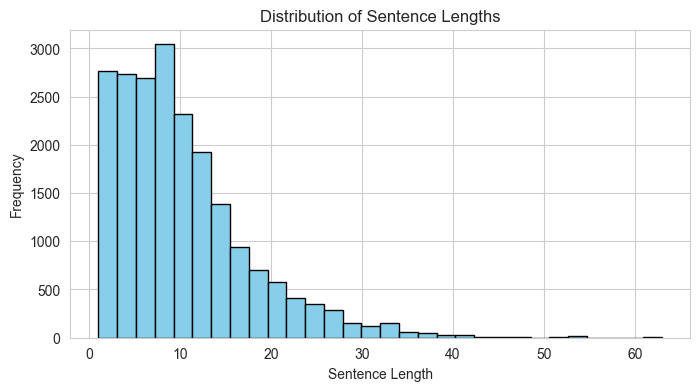

In [12]:
#Frequency de Sentence Length
data = df['Sentence length']

plt.figure(figsize=(8, 4))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()

<Axes: xlabel='IsExperience', ylabel='Sentence length'>

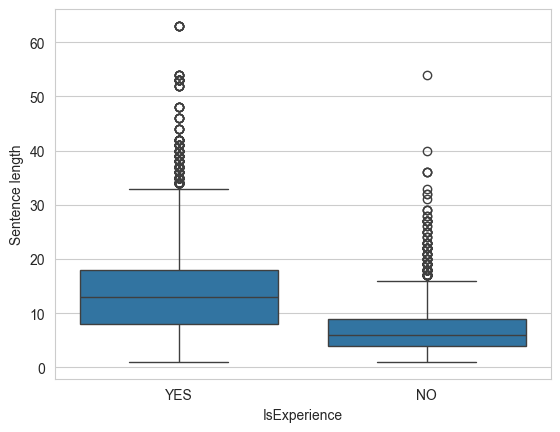

In [13]:
sns.boxplot(y='Sentence length',x='IsExperience',data=df)

                      Verbs number  Adjectives number  Stopwords number  \
Verbs number              1.000000           0.299928          0.572872   
Adjectives number         0.299928           1.000000          0.397135   
Stopwords number          0.572872           0.397135          1.000000   
Sentence length           0.610378           0.533674          0.693489   
Nouns number              0.489311           0.429159          0.463405   
Special chars number      0.070738           0.088541          0.105358   
Punctuation number        0.254453           0.286881          0.252191   
Digits number            -0.160241          -0.105328         -0.119545   
Skills number             0.353836           0.406018          0.276786   

                      Sentence length  Nouns number  Special chars number  \
Verbs number                 0.610378      0.489311              0.070738   
Adjectives number            0.533674      0.429159              0.088541   
Stopwords number  

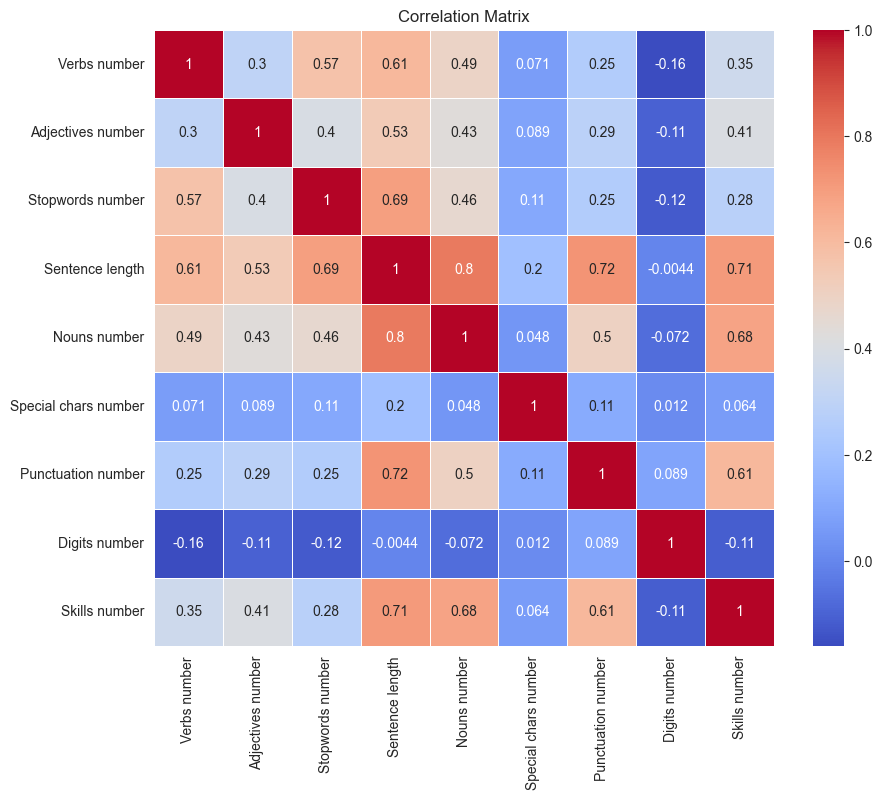

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


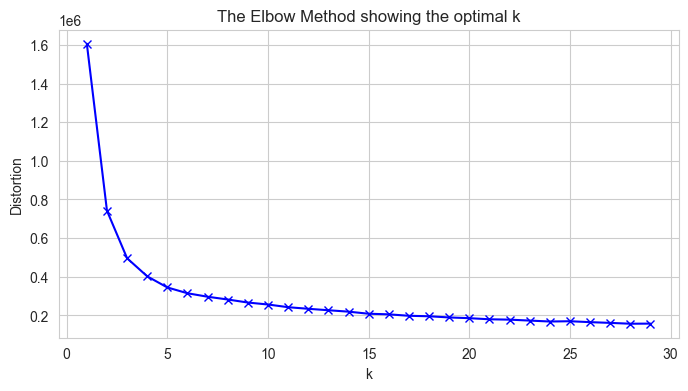

In [16]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df.drop(columns=["experiences","IsExperience"]))
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
df = df.drop(df[(df['IsExperience'] == 'YES') & ((df['Sentence length'] < 3) | (df['Sentence length'] > 28))].index)
df = df.drop(df[(df['IsExperience'] == 'YES') & (df['experiences'].str.contains("\?"))].index)
df.shape
from sklearn.calibration import LabelEncoder

numeric_features = ['Verbs number', 'Adjectives number', 'Stopwords number', 'Sentence length', 
                    'Nouns number', 'Special chars number', 'Punctuation number', 'Digits number', 'Skills number']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=2))
])

categorical_features = ['experiences']   
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = df.drop('IsExperience', axis=1)
y = df['IsExperience']
X_transformed = preprocessor.fit_transform(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y=y_encoded

<>:2: SyntaxWarning: invalid escape sequence '\?'
<>:2: SyntaxWarning: invalid escape sequence '\?'
C:\Users\khmir\AppData\Local\Temp\ipykernel_21036\2988274084.py:2: SyntaxWarning: invalid escape sequence '\?'
  df = df.drop(df[(df['IsExperience'] == 'YES') & (df['experiences'].str.contains("\?"))].index)


In [18]:


classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}
 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=np.random.randint(1000))




SVM accuracy: 0.9486493714897031
[[1829  110]
 [  82 1718]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1939
           1       0.94      0.95      0.95      1800

    accuracy                           0.95      3739
   macro avg       0.95      0.95      0.95      3739
weighted avg       0.95      0.95      0.95      3739

----------------------------------------------------------
Logistic Regression accuracy: 0.9213693500936079
[[1787  152]
 [ 142 1658]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1939
           1       0.92      0.92      0.92      1800

    accuracy                           0.92      3739
   macro avg       0.92      0.92      0.92      3739
weighted avg       0.92      0.92      0.92      3739

----------------------------------------------------------
Random Forest accuracy: 0.9812784166889542
[[1869   70]
 [   0 1800]]
              precisio

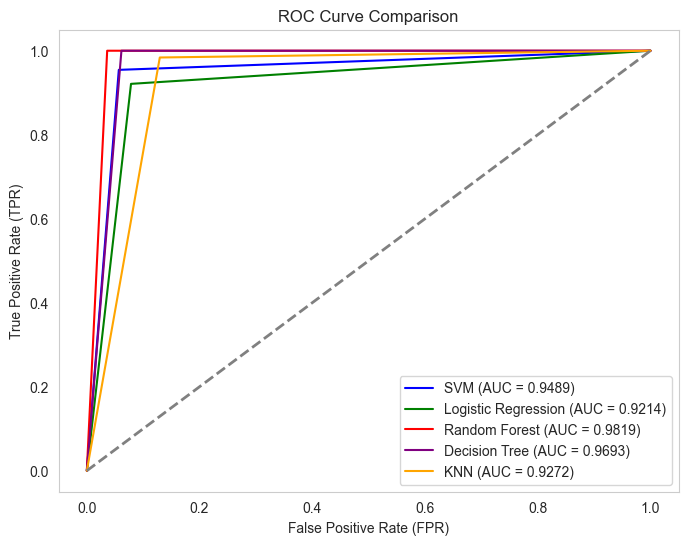

In [19]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Define unique colors for each model (replace with desired palette if necessary)
colors = ['blue', 'green', 'red', 'purple', 'orange'] 
for i, (name, classifier) in enumerate(classifiers.items()):
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------")
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.4f})')

# Add common plot elements
plt.title('ROC Curve Comparison')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Adding diagonal line

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

[[1829  110]
 [  82 1718]]


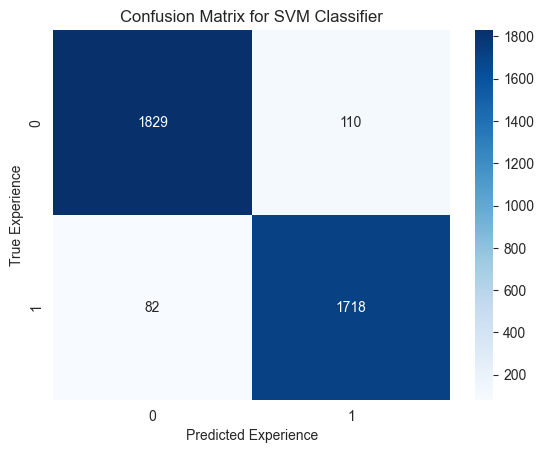

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_model = svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel("Predicted Experience")
plt.ylabel("True Experience")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()
 


In [32]:
input_file_path = r"C:\Users\khmir\Downloads\cv_english.txt"

with open(input_file_path, 'r') as file:
    sentences = file.readlines()
    
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher) 
def extract_skills(skill_extractor, sentences):
    annotations = skill_extractor.annotate(sentences)
    unique_values = set() 

    for item in annotations['results']['full_matches']:
        unique_values.add(item['doc_node_value'].lower())

    for item in annotations['results']['ngram_scored']:
        unique_values.add(item['doc_node_value'].lower())
    print(list(unique_values))
    return list(unique_values)




def count_verbs(sentence):
    doc = nlp(sentence)
    verbs = len([token for token in doc if token.pos_ == 'VERB'])
    return verbs

def count_adjectives(sentence):
    doc = nlp(sentence)
    adjectives = len([token for token in doc if token.pos_ == 'ADJ'])
    return adjectives

def count_stopwords(sentence):
    doc = nlp(sentence)
    stopwords = len([token for token in doc if token.is_stop])
    return stopwords

def calculate_sentence_length(sentence):
    doc = nlp(sentence)
    sentence_length = len(doc)
    return sentence_length

def count_nouns(sentence):
    doc = nlp(sentence)
    nouns = len([token for token in doc if token.pos_ == 'NOUN'])
    return nouns

def count_special_characters(sentence):
    doc = nlp(sentence)
    special_chars = len([token for token in doc if not token.text.isalnum() and not token.is_punct])
    return special_chars

def count_skills(skill_extractor, sentence):
    doc = nlp(sentence)
    skills = len(extract_skills(skill_extractor, sentence))
    return skills

def count_punctuation(sentence):
    doc = nlp(sentence)
    punctuation_number = len([token for token in doc if token.is_punct])
    return punctuation_number

def count_digits(sentence):
    doc = nlp(sentence)
    digits_number = len([token for token in doc if token.is_digit])
    return digits_number
 
data_list = []


for sentence in sentences:

    ligne_cv = pd.DataFrame({'experiences': [sentence], 
                               'Verbs number': [count_verbs(sentence)],   
                               'Adjectives number': [count_adjectives(sentence)],   
                               'Stopwords number': [count_stopwords(sentence)],   
                               'Sentence length': [calculate_sentence_length(sentence)],
                               'Nouns number': [count_nouns(sentence)],  
                               'Special chars number': [count_special_characters(sentence)],   
                               'Punctuation number': [count_punctuation(sentence)],  
                               'Digits number': [count_digits(sentence)],  
                               'Skills number': [count_skills(skill_extractor, sentence)]})
    

    data_list.append(ligne_cv)
input_ligne_cv = pd.concat(data_list, ignore_index=True)


X_input_transformed = preprocessor.transform(input_ligne_cv)

predictions = {}

random_forest_classifier = classifiers['Decision Tree']
y_pred_input = random_forest_classifier.predict(X_input_transformed)

# Store the prediction
predictions = {'Random Forest': y_pred_input}

# Print the predictions
print(predictions)
predicted_as_1 = input_ligne_cv[predictions['Random Forest'] == 1]

print("Sentences predicted as YES by Random Forest classifier:")
for index, row in predicted_as_1.iterrows():
    print(f"{index}: {row['experiences']}")

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...
[]
['com']
[]
['tunis']
[]
[]
['tunis', 'economics']
[]
[]
['data cleaning', 'machine learning', 'predictive models', 'data science', 'feature engineering', 'algorithms']


c:\Users\khmir\AppData\Local\Programs\Python\Python313\Lib\site-packages\skillNer\utils.py:99: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  vec_similarity = token1.similarity(token2)


['collaborated', 'java applications', 'backend', 'cross functional teams', 'java']
[]
[]
['python']
['machine learn']
['data analysis']
['sql']
['power bi']
[]
[]
['arabic']
['french']
['english']
{'Random Forest': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])}
Sentences predicted as YES by Random Forest classifier:
10: - Java Developer at XYZ Company, January 2023 - May 2024. Responsibilities: Developed Java applications, optimized backend systems, and collaborated in cross-functional teams to deliver software solutions.

